# `Практикум по программированию на языке Python`
<br>

## `Занятие 13: Серверная Web-разработка`
<br><br>

### `Роман Ищенко (roman.ischenko@gmail.com)`

#### `Москва, 2023`

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def run_last_script(use_cached=True):
    import os
    if not os.path.exists('temp.txt') or not use_cached:
        with open('temp.txt', 'w') as fout:
            fout.write(In[len(In)-2])
    !python temp.txt

### `Python web-server libs`

#### `Flask`
Flask — микрофреймворк для создания вебсайтов на языке Python.

In [ ]:
# Простейший сервер на flask
from flask import Flask

app = Flask(__name__)

@app.route('/', methods=['GET'])
def hello_world():
   return 'Hello, World!'
   
@app.route('/post')
def hello_path():
   return 'Hello, Path!'
   
if __name__ == '__main__':
   app.run()

In [ ]:
# Можно открыть в браузере или написать простейший клиент на Python
import requests
r = requests.get('http://127.0.0.1:5000/post')
print(r.status_code)
print(r.headers)
print(r.content)

По умолчанию `route` отвечает только на `GET` запросы.<br>
Если нужно, можно явно добавить HTTP-методы, которые будут обрабатываться


In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def hello_world():
    print(request.method)
    return {'data': 'Hello, World!'}
   
if __name__ == '__main__':
   app.run()

В пути можно использовать переменные

Синтаксис: `<converter:variable_name>`

Доступные converters:
- string
- int
- float
- path
- uuid


In [ ]:
@app.route('/hello/<string:name>')
def hello_name(name):
    return f'Hello {name}!'

In [ ]:
import requests
r = requests.get('http://127.0.0.1:5000/hello/John')
print(r.content)

Flask используется для разработки и отладки.

Для промышленной эксплуатации необходимо использование WSGI (Web Server Gateway Interface) сервера:
- WSGI-сервера были разработаны чтобы обрабатывать множество запросов одновременно. А фреймворки (в том числе flask) не предназначены для обработки тысяч запросов и не дают решения того, как наилучшим образом маршрутизировать запросы с веб-сервера.
- с WSGI  не нужно беспокоиться о том, как ваша конкретная инфраструктура использует стандарт WSGI.
- WSGI дает Вам гибкость в изменении компонентов веб-стека без изменения приложения, которое работает с WSGI.

Если не планируется большой нагрузки, для `flask` это может быть `waitress`.

Установка: `pipenv install waitress`

Использование:

In [ ]:
from waitress import serve
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
   return 'Hello, World!'
   
if __name__ == '__main__':
    # Вместо запуска flask запускаем waitress.serve
    # app.run(threaded=False, processes=2)
    #  serve(app, host='0.0.0.0', port='5000', threads=2, connection_limit=4)
    serve(app, host='0.0.0.0', port='5000')


Либо запускаем из командной строки: `waitress-serve --port 5000 '<имя модуля>:<перемнная приложения>'`

Если наш файл называется `server.py`, то наш пример можно запустить командой: `waitress-serve --port 5000 'server:app'`

#### `FastAPI`

FastAPI — фреймворк для создания лаконичных и довольно быстрых HTTP API-серверов

In [ ]:
from typing import Optional
from fastapi import FastAPI

app = FastAPI()


@app.get("/")
def hello_world(q: Optional[str] = None):
    return {'data': f'Hello, World! Param: {q}'}


@app.post("/items/{item_id}")
@app.get("/items/{item_id}")
def read_item(item_id: int, a: int, q: Optional[str] = None):
    return {"item_id": item_id, "q": q}


In [ ]:
from typing import Optional

from fastapi import FastAPI
from pydantic import BaseModel


class Item(BaseModel):
    name: str
    description: Optional[str] = None


app = FastAPI()


@app.post("/")
async def create_item(item: Item):
    return item

In [ ]:
import requests
r = requests.post('http://127.0.0.1:8000/', json={'name': 'John', 'tt': 1})
print(r.status_code, r.content)

FastAPI требует уже ASGI (Asynchronous Standard Gateway Interface) сервера, например, uvicorn

Запуск приложения: `uvicorn '<имя модуля>:<перемнная приложения>'`

Все запросы к веб-сервису выполняются последовательно. Можно использовать асинхронность и многопоточность, но мы знаем, что она сработает не во всех случаях.

Эту проблему решают масштабированием через внешние WSGI-серверы. Для Python их существует некоторое количество: Bjoern, uWSGI, mod_wsgi, Meinheld, CherryPy, Gunicorn.

Gunicorn — это WSGI-сервер, созданный для использования в UNIX-системах. Название — сокращенная и комбинированная версия слов «Green Unicorn». На самом сайте проекта есть зеленый единорог. Gunicorn был перенесен из проекта «Unicorn» из языка Ruby. Он относительно быстрый, не требует много ресурсов, легко запускается и работает с широким спектром веб-фреймворков.

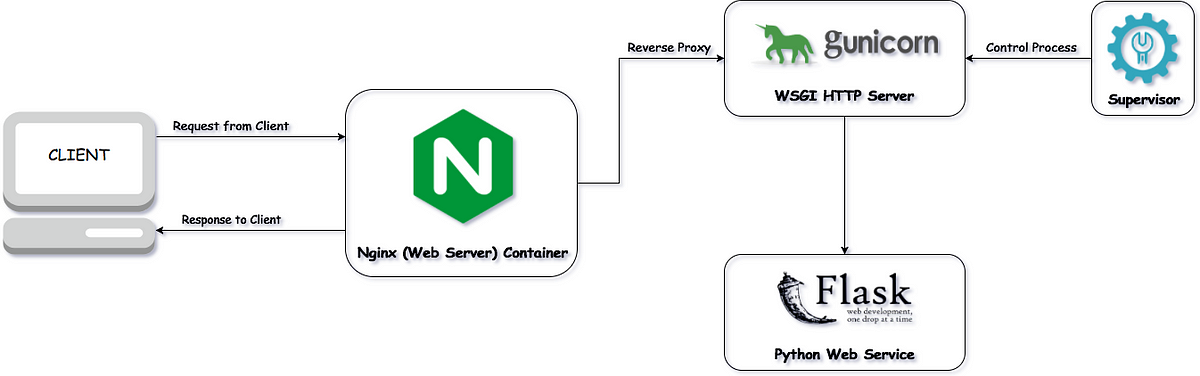

Запуск для нашего примера для Flask: `gunicorn --bind 0.0.0.0:5000 --workers 4 'server:app'`

Запуск для нашего примера для FastAPI:`gunicorn --access-logfile - --bind 0.0.0.0:8000 --workers 2 -k uvicorn.workers.UvicornWorker server:app`

### `Пример сервера на Python`

- Опишем код учебного серверного приложения для обучения и использования лог-регрессии на текстах<br><br>

- Что требуется сделать:
    - код классификатора (`classifier.py`)
    - код сервера (`server.py`)
    - код клиентских запросов
    - код `Pipfile`<br><br>

- Для упрощения
    - опустим ряд проверок корректности
    - требования к эффективности реализации кода классификатора
    - логгирование<br><br>

- Все файлы находятся в одной корневой директории проекта

### `Пример: Flask`

Файл `classifier.py`

- Импорты:

In [ ]:
import pickle
import shutil
import numpy as np

from pathlib import Path
from typing import List, Literal, Union, Tuple
from dataclasses import dataclass
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

- Классы-конфигурации методов (удобно использовать `dataclass`-ы)

In [ ]:
@dataclass
class FitConfig:
    model_path: str
    feature_type: Union[Literal['tf-idf'], Literal['bow']]

@dataclass
class PredictConfig:
    model_path: str
    top_n: int

### `Пример: Flask`

Файл `classifier.py`

- Класс `TextClassifier`:

In [ ]:
class TextClassifier:
    @staticmethod
    def fit(texts: List[str], labels: List[str], config: FitConfig) -> None:
        if config.feature_type == 'tf-idf':
            vectorizer = TfidfVectorizer()

        elif config.feature_type == 'bow':
            vectorizer = CountVectorizer()

        else:
            raise ValueError(f'Unknown config.feature_type: "{config.feature_type}"')

        data = vectorizer.fit_transform(texts)
        model = LogisticRegression()
        model.fit(data, labels)

        model_path = Path(config.model_path)

        if model_path.exists():
            shutil.rmtree(model_path)
        model_path.mkdir()

        with open(model_path / 'model.pkl', 'wb') as fout:
            pickle.dump(model, fout)

        with open(model_path / 'vectorizer.pkl', 'wb') as fout:
            pickle.dump(vectorizer, fout)

### `Пример: Flask`

Файл `classifier.py`

- Класс `TextClassifier`:

In [ ]:
# class TextClassifier:
    @staticmethod
    def predict(texts: List[str], config: PredictConfig) -> List[List[Tuple[str, float]]]:
        model_path = Path(config.model_path)

        if not model_path.exists() or not model_path.is_dir():
            raise ValueError(f'Path "{model_path}" is not a valid path to model')

        if not (model_path / 'model.pkl').exists() or not (model_path / 'vectorizer.pkl').exists():
            raise ValueError(f'Model from "{model_path}" is corrupted')

        if config.top_n <= 0:
            raise ValueError(f'Top n value "{config.top_n}" must be positive int')

        with open(model_path / 'model.pkl', 'rb') as fin:
            model = pickle.load(fin)

        with open(model_path / 'vectorizer.pkl', 'rb') as fin:
            vectorizer = pickle.load(fin)

        scores_list = model.predict_proba(vectorizer.transform(texts))

        predicted = []
        for scores in scores_list:
            sorted_scores = np.sort(scores)[::-1]
            sorted_labels = [model.classes_[i] for i in np.argsort(scores)][::-1]
            predicted.append(list(zip(sorted_labels, sorted_scores))[: config.top_n])

        return predicted

### `Пример: Flask`

Файл `server.py`

- Импорты и объявление переменной приложения `app`:

In [ ]:
import os
import sys
import json
import traceback

from flask import Flask
from flask import request
from waitress import serve

from classifier import TextClassifier, FitConfig, PredictConfig

app = Flask(__name__)

### `Пример: Flask`

Файл `server.py`

- Добавим в приложение обработчик `POST`-запроса на обучение модели:

In [ ]:
@app.route('/fit', methods=['POST'])
def fit():
    try:
        texts = request.json['texts']
        labels = request.json['labels']

        config_dict = request.json['config']
        config = FitConfig(model_path=config_dict['model_path'], feature_type=config_dict['feature_type'])

        TextClassifier.fit(texts=texts, labels=labels, config=config)

        return {'success': True}

    except Exception as error:
        return {
            'success': False,
            'message': str(error),
            'traceback': traceback.format_exc(),
        }

### `Пример: Flask`

Файл `server.py`

- Добавим в приложение обработчик `POST`-запроса на применение модели:

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    try:
        texts = request.json['texts']
        config_dict = request.json['config']
        config = PredictConfig(model_path=config_dict['model_path'], top_n=config_dict['top_n'])

        predicted = TextClassifier.predict(texts=texts, config=config)

        return {
            'success': True,
            'predicted': predicted,
        }
    except Exception as error:
        return {
            'success': False,
            'message': str(error),
            'traceback': traceback.format_exc(),
        }

### `Пример: Flask`

Файл `server.py`

- Определим код запуска хостинга сервера средствами `flask`:

In [ ]:
if __name__ == '__main__':
    if len(sys.argv) != 3:
        print('Run `python server.py <HOST> <PORT>`')
        sys.exit(1)

    host = sys.argv[1]
    port = sys.argv[2]

    print(f'Start server on {host}:{port}')
    app.run(host=host, port=port)

- Поднять сервер можно командой

    `python server.py 0.0.0.0 1234`

### `Пример: Flask`

- Пример запроса на обучение модели для библиотеки `requests`:

In [ ]:
import requests
model_path = 'test-model'

result_fit = requests.post(url='http://0.0.0.0:1234/fit',
                           json={
                               'texts': ['i love cats', 'cats are the best', 'what about dogs', 'i love dogs'],
                               'labels': ['cats', 'cats', 'dogs', 'dogs'],
                               'config': {'model_path': model_path, 'feature_type': 'bow'},
                               })
print(result_fit.json())

In [ ]:
!ls -lt ../../../clsf/test-model

### `Пример: Flask`

- Пример запроса на предсказание модели для библиотеки `requests`:

In [ ]:
result_predict = requests.post(url='http://0.0.0.0:1234/predict',
                               json={
                                   'texts': ['i like dogs', 'i walk with cats'],
                                   'config': {'model_path': model_path, 'top_n': 2},
                               })
print(result_predict.json())

### `Пример: Flask, нагрузочное тестирование`


- Для оценки скорости обработки используем стандартный текстовый датасет для классификации из `sklearn`:

In [ ]:
import requests
from sklearn.datasets import fetch_20newsgroups

model_path = 'test-model'

dataset = fetch_20newsgroups()
texts = dataset['data']
labels = [dataset['target_names'][i] for i in dataset['target']]

result_fit = requests.post(url='http://0.0.0.0:1234/fit',
                           json={
                               'texts': texts,
                               'labels': labels,
                               'config': {'model_path': model_path, 'feature_type': 'bow'},
                               })
print(result_fit.json())

### `Пример: Flask, нагрузочное тестирование`

- Для запуска асинхронных запросов используем библиотеку `aiohttp`
- Библиотека не позволяет работу из Jupyter Notebook (из-за наличия event loop), нужно запустить код ниже в виде скрипта:

In [ ]:
import time
import asyncio
import aiohttp

from sklearn.datasets import fetch_20newsgroups

num_requests = 20
model_path = 'test-model'
dataset = fetch_20newsgroups()
texts = dataset['data']
labels = [dataset['target_names'][i] for i in dataset['target']]

async def post(session):
    async with session.post(url='http://0.0.0.0:1234/predict',
                            json={
                                'texts': texts[: 5000],
                                'config': {'model_path': model_path, 'top_n': 3}
                            }) as response:
        await response.read()

async def main():
    async with aiohttp.ClientSession() as session:
        await asyncio.gather(*[post(session) for _ in range(num_requests)])

try:
    ts = time.time()
    asyncio.run(main())
    print(f'Elapsed time for {num_requests} requests: {round(time.time() - ts, 2)} sec.')
except:
    pass

In [ ]:
run_last_script()

### `Пример: Flask, нагрузочное тестирование`

- Встроенный сервер Flask является тестовым и не предназначен для использования в production-окружении (мнение разработчиков Flask)
- По этой причине лучше "закрыть" его WSGI-сервером, например, `waitress`
- Это даст ускорение (минимальное), в т.ч. за счёт того, что сервер и обработчик запросов будут работать в разных процессах (на многоядерных системах)<br><br>

- Изменим код запуска хостинга сервера средствами `flask`:

In [ ]:
# from waitress import serve

if __name__ == '__main__':
    if len(sys.argv) != 3:
        print('Run `python server.py <HOST> <PORT>`')
        sys.exit(1)

    host = sys.argv[1]
    port = sys.argv[2]

    print(f'Start server on {host}:{port}')
    serve(app, host=host, port=port)

- Перезапустим сервер и прогоним тест вторично:

In [ ]:
run_last_script(use_cached=True)

### `Пример: Flask, нагрузочное тестирование`

- При наличии ресурсов обработку запросов можно производить параллельно
- Запуск нескольких параллельных процессов-обработчиков и балансировку запросов можно обеспечить с помощью `gunicorn`
- Для этого достаточно запустить сервер командой

    `gunicorn --bind 0.0.0.0:1234 --workers 2 'server:app'`<br><br>
    
- Прогоним тест ещё раз:

In [ ]:
run_last_script(use_cached=True)

### `Пример: Flask`

Файл `Pipfile`

```
[[source]]
name = "pypi"
url = "https://pypi.org/simple"
verify_ssl = true

[packages]
flask = "*"
waitress = "*"
scikit-learn = "*"
gunicorn = "*"
aiohttp = "*"

[requires]
python_version = "3.8"
```

### `Библиотека FastAPI`

- Flask основан на интерфейсе WSGI, FastAPI - на более быстром и современном ASGI (а именно на фреймворке Starlette)
- Flask работает на уровне JSON и требует ручной валидации данных, FastAPI использует Pydantic
- Flask требует документирования API, FastAPI поддерживает OpenAPI и позволяет выводить API-спеки автоматически
- Скорость и удобство разработки у обоих фреймворков схожая
- FastAPI + Uvicorn + Gunicorn позволяет описывать и хостить production-серверы на Python на уровне Go и NodeJS<br><br>

- Реализуем описанный выше пример на FastAPI
- Опишем детальный набор структур данных в файле `structures.py` (его можно оптимизировать для одного сервиса, а можно развить в систему типов, если похожих сервисов будет много)

### `Пример: FastAPI`

Файл `Pipfile`

```
[[source]]
name = "pypi"
url = "https://pypi.org/simple"
verify_ssl = true

[packages]
fastapi = "*"
pydantic = "*"
scikit-learn = "*"
gunicorn = "*"
uvicorn = "*"
aiohttp = "*"

[requires]
python_version = "3.8"
```

### `Пример: FastAPI`

Файл `structures.py`

In [ ]:
from typing import List, Literal, Union, Tuple, Optional
from pydantic import BaseModel, constr, PositiveInt, validator

class FitConfig(BaseModel):
    model_path: constr(min_length=1)
    feature_type: Union[Literal['tf-idf'], Literal['bow']]

class PredictConfig(BaseModel):
    model_path: constr(min_length=1)
    top_n: PositiveInt

class Texts(BaseModel):
    texts: List[str]

class Labels(BaseModel):
    labels: List[str]

class Scores(BaseModel):
    scores: List[float]

class Prediction(BaseModel):
    labels_list: List[Labels]
    scores_list: List[Scores]

class ReturnValue(BaseModel):
    success: bool
    message: Optional[str]
    traceback: Optional[str]

class PredictReturnValue(ReturnValue):
    prediction: Optional[Prediction]

### `Пример: FastAPI`

Файл `classifier.py`

- Импорты:

In [ ]:
import pickle
import shutil
import numpy as np

from pathlib import Path

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from structures import FitConfig, PredictConfig, Texts, Labels, Scores, Prediction

### `Пример: FastAPI`

Файл `classifier.py`

- Класс `TextClassifier`:

In [ ]:
class TextClassifier:
    @staticmethod
    def fit(texts: Texts, labels: Labels, config: FitConfig) -> None:
        if config.feature_type == 'tf-idf':
            vectorizer = TfidfVectorizer()

        elif config.feature_type == 'bow':
            vectorizer = CountVectorizer()

        else:
            raise ValueError(f'Unknown config.feature_type: "{config.feature_type}"')

        data = vectorizer.fit_transform(texts.values)
        model = LogisticRegression()
        model.fit(data, labels.values)

        ...
        # the same as earlier

### `Пример: FastAPI`

Файл `classifier.py`

- Класс `TextClassifier`:

In [ ]:
# class TextClassifier:
    @staticmethod
    def predict(texts: Texts, config: PredictConfig) -> Prediction:
        ...
        # the same as earlier

        scores_list = model.predict_proba(vectorizer.transform(texts.values))

        labels_list_ = []
        scores_list_ = []

        for scores in scores_list:
            sorted_scores = list(np.sort(scores))[::-1]
            sorted_labels = [model.classes_[i] for i in np.argsort(scores)][::-1]
            labels_list_.append(sorted_labels[: config.top_n])
            scores_list_.append(sorted_scores[: config.top_n])

        return Prediction(
            labels_list=[Labels(values=labels) for labels in labels_list_],
            scores_list=[Scores(values=scores) for scores in scores_list_],
        )

### `Пример: FastAPI`

Файл `server.py`

- Импорты и объявление переменной приложения `app` + функция для формирования из метода словаря аргументов с типами:

In [ ]:
import sys
import inspect
import traceback

import uvicorn

from fastapi import FastAPI
from pydantic import create_model

from classifier import TextClassifier
from structures import FitConfig, PredictConfig, Texts, ReturnValue, PredictReturnValue

app = FastAPI()

def get_params(method):
    return {k: (v.annotation, ...) for k, v in inspect.signature(method).parameters.items()}

### `Пример: FastAPI`

Файл `server.py`

- Добавим в приложение обработчик `POST`-запроса на обучение модели:

In [ ]:
@app.post("/fit", response_model=ReturnValue, name='Fit')
async def fit(request: create_model('FitInput', **get_params(TextClassifier.fit))):
    try:
        TextClassifier.fit(texts=request.texts, labels=request.labels, config=request.config)

        return ReturnValue(success=True)

    except Exception as error:
        return ReturnValue(
            success=False,
            message=str(error),
            traceback=str(traceback.format_exc()),
        )

### `Пример: FastAPI`

Файл `server.py`

- Добавим в приложение обработчик `POST`-запроса на применение модели:

In [ ]:
@app.post("/predict", response_model=PredictReturnValue, name='Predict')
async def predict(request: create_model('PredictInput', **get_params(TextClassifier.predict))):
    try:
        return PredictReturnValue(success=True,
                                  predicted=TextClassifier.predict(texts=request.texts, config=request.config))
    except Exception as error:
        return PredictReturnValue(
            success=False,
            message=str(error),
            traceback=str(traceback.format_exc()),
        )

### `Пример: FastAPI`

Файл `server.py`

- Определим код запуска хостинга сервера средствами `uvicorn`:

In [ ]:
if __name__ == '__main__':
    if len(sys.argv) != 3:
        print('Run `python server.py <HOST> <PORT>`')
        sys.exit(1)

    host = sys.argv[1]
    port = int(sys.argv[2])

    uvicorn.run('server:app', host=host, port=port)

- Поднять сервер можно той же командой

    `python server.py 0.0.0.0 1234`

### `Пример: FastAPI`

- API сервиса является самодокументированным за счёт типизации Pydanctic
- Посмотреть и опробовать его можно по адресу `<host>:<port>/docs` (Swagger)<br><br>

- Пример запроса на обучение модели для библиотеки `requests` (то же самое можно сделать через интерфейс Swagger):

In [ ]:
model_path = 'test-model'

requests.post(url='http://0.0.0.0:1234/fit',
              json={
                  'texts': {
                      'values': ['i love cats', 'cats are the best',
                                 'what about dogs', 'i love dogs'],
                  },
                  'labels': {
                      'values': ['cats', 'cats', 'dogs', 'dogs'],
                  },
                  'config': {
                      'model_path': model_path,
                      'feature_type': 'bow',
                  },
              })

### `Пример: FastAPI`

- Пример запроса на предсказание модели для библиотеки `requests`:

In [ ]:
requests.post(url='http://0.0.0.0:1234/fit',
              json={
                  'texts': {
                      'values': ['i like dogs', 'i walk with cats'],
                  },
                  'config': {
                      'model_path': model_path,
                      'top_n': 2,
                  },
              })

### `Пример: FastAPI, нагрузочное тестирование`

In [ ]:
import requests
from sklearn.datasets import fetch_20newsgroups

model_path = 'test-model'

dataset = fetch_20newsgroups()
texts = dataset['data']
labels = [dataset['target_names'][i] for i in dataset['target']]

result_fit = requests.post(url='http://0.0.0.0:1234/fit',
                           json={
                               'texts': {'values': texts},
                               'labels': {'values': labels},
                               'config': {'model_path': model_path, 'feature_type': 'bow'},
                               })
print(result_fit.json())

### `Пример: FastAPI, нагрузочное тестирование`

In [ ]:
import time
import asyncio
import aiohttp

from sklearn.datasets import fetch_20newsgroups

num_requests = 20
model_path = 'test-model'

async def post(session):
    async with session.post(url='http://0.0.0.0:1234/predict',
                            json={
                                'texts': {'values': texts[: 5000]},
                                'config': {'model_path': model_path, 'top_n': 3}
                            }) as response:
        await response.read()

async def main():
    async with aiohttp.ClientSession() as session:
        await asyncio.gather(*[post(session) for _ in range(num_requests)])

dataset = fetch_20newsgroups()
texts = dataset['data']
labels = [dataset['target_names'][i] for i in dataset['target']]

try:
    ts = time.time()
    asyncio.run(main())
    print(f'Elapsed time for {num_requests} requests: {round(time.time() - ts, 2)} sec.')
except:
    pass

In [ ]:
run_last_script(use_cached=False)

### `Пример: FastAPI, нагрузочное тестирование`

- Запуск нескольких параллельных процессов-обработчиков и балансировку запросов можно обеспечить с помощью `gunicorn`
- Для этого достаточно запустить сервер командой

    `gunicorn --bind 0.0.0.0:1234 -w 2 -k uvicorn.workers.UvicornWorker server:app`<br><br>
    
- Прогоним тест ещё раз:

In [ ]:
run_last_script(use_cached=True)

### `Пример: FastAPI, спецификация API`

- Для приложения FastAPI легко получить OpenAPI-спецификацию в виде JSON или YAML
- Это спеку можно конвертировать и использовать для формирования запросов на любом подходящем языке программирования

Получить спеку приложения в виде JSON можно вызовом `app.openapi()`:

In [ ]:
# app.openapi().keys()
dict_keys(['openapi', 'info', 'paths', 'components'])

# app.openapi()['paths']['/fit']
{
    'post': {
        'summary': 'Fit',
        'operationId': 'Fit_fit_post',
        'requestBody': {
            'content': {
                'application/json': {
                    'schema': {
                        '$ref': '#/components/schemas/FitInput'
                    }
                }
            },
            'required': True
        },
        'responses': {
            '200': {
                'description': 'Successful Response',
                'content': {
                    'application/json': {
                        'schema': {
                            '$ref': '#/components/schemas/ReturnValue'
                        }
                    }
                }
            },
            '422': {
                'description': 'Validation Error',
                'content': {
                    'application/json': {
                        'schema': {
                            '$ref': '#/components/schemas/HTTPValidationError'
                        }
                    }
                }
            }
        }
    }
}

### `Пример: FastAPI, спецификация API`

In [ ]:
# app.openapi()['components']['schemas'].keys()

dict_keys(['FitConfig', 'FitInput', 'HTTPValidationError', 'Labels',
           'PredictConfig', 'PredictInput', 'PredictReturnValue',
           'Prediction', 'ReturnValue', 'Scores', 'Texts', 'ValidationError'])

# app.openapi()['components']['schemas']['FitInput']
{
    'title': 'FitInput',
    'required': [
        'texts',
        'labels',
        'config'
    ],
    'type': 'object',
    'properties': {
        'texts': {
            '$ref': '#/components/schemas/Texts'
        },
        'labels': {
            '$ref': '#/components/schemas/Labels'
        },
        'config': {
            '$ref': '#/components/schemas/FitConfig'
        }
    }
}

## `Спасибо за внимание!`